In [445]:
import pylab
import calendar
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import model_selection, metrics
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [446]:
raw_data = pd.read_csv('train.csv')
test_raw_data = pd.read_csv('test.csv')

In [447]:
raw_data.shape

(10886, 12)

In [448]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [449]:
test_data.head()

,holiday,workingday,temp,humidity,windspeed,Hour,Month,Year,Day of Week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
9886,0,1,17.22,67,6.0032,7,10,2012,1,0,0,0,1,1,0,0,0
9887,0,1,18.04,62,0.0000,8,10,2012,1,0,0,0,1,1,0,0,0
9888,0,1,19.68,55,16.9979,9,10,2012,1,0,0,0,1,1,0,0,0
9889,0,1,20.50,48,19.0012,10,10,2012,1,0,0,0,1,1,0,0,0
9890,0,1,20.50,45,27.9993,11,10,2012,1,0,0,0,1,1,0,0,0


In [450]:
raw_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [451]:
raw_data.isnull().values.any()

False

### EXPLORING THE FEATURES
#### The distribution of various discrete features such as weather , season, working day, holiday

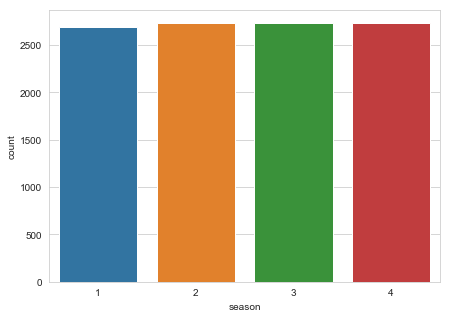

In [452]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='season',data=raw_data, ax = ax)

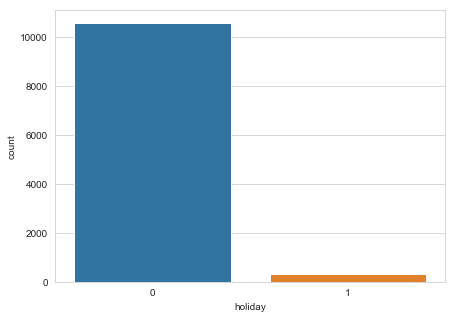

In [453]:
dims = (7, 5)
fig, ax = plt.subplots(figsize = dims)

sns.countplot(x='holiday',data=raw_data, ax = ax) # majority of data is for non holiday days.

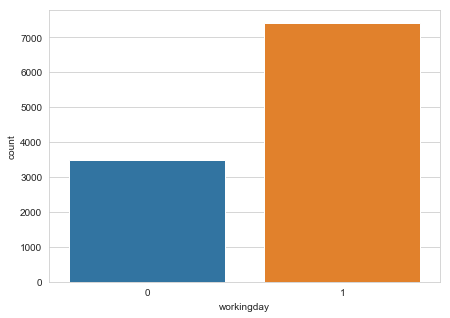

In [454]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(x='workingday',data=raw_data, ax = ax) # majority of data is for working days.

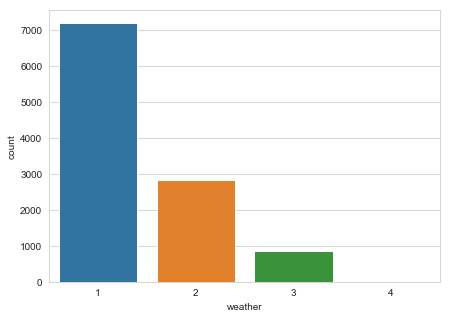

In [455]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(x='weather',data=raw_data, ax = ax) 

#### Correlation between the features

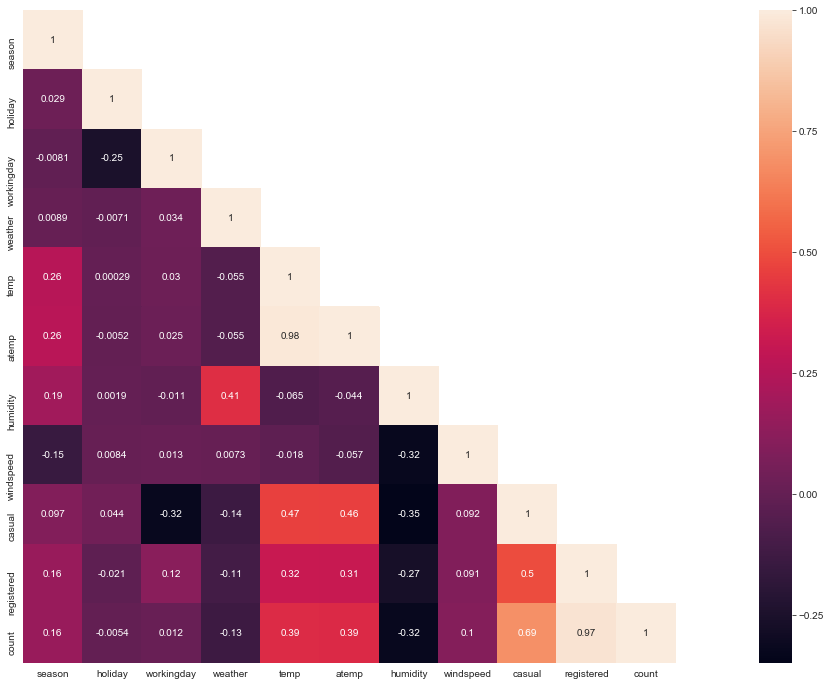

In [456]:
#corelation matrix
cor_mat= raw_data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#### INFERENCES FROM THE ABOVE HEATMAP

Temp and atemp are highly related as expected and highly effects the count.

Humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

Casual and working day are highly inversely related as you would expect.

Count and holiday are highly inversely related as you would expect.

Weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

Registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

In [457]:
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])
raw_data['Hour'] = raw_data['datetime'].apply(lambda time: time.hour)
raw_data['Month'] = raw_data['datetime'].apply(lambda time: time.month)
raw_data['Year'] = raw_data['datetime'].apply(lambda time:time.year)
raw_data['Day of Week'] = raw_data['datetime'].apply(lambda time: time.dayofweek)

In [458]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Year,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5


[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

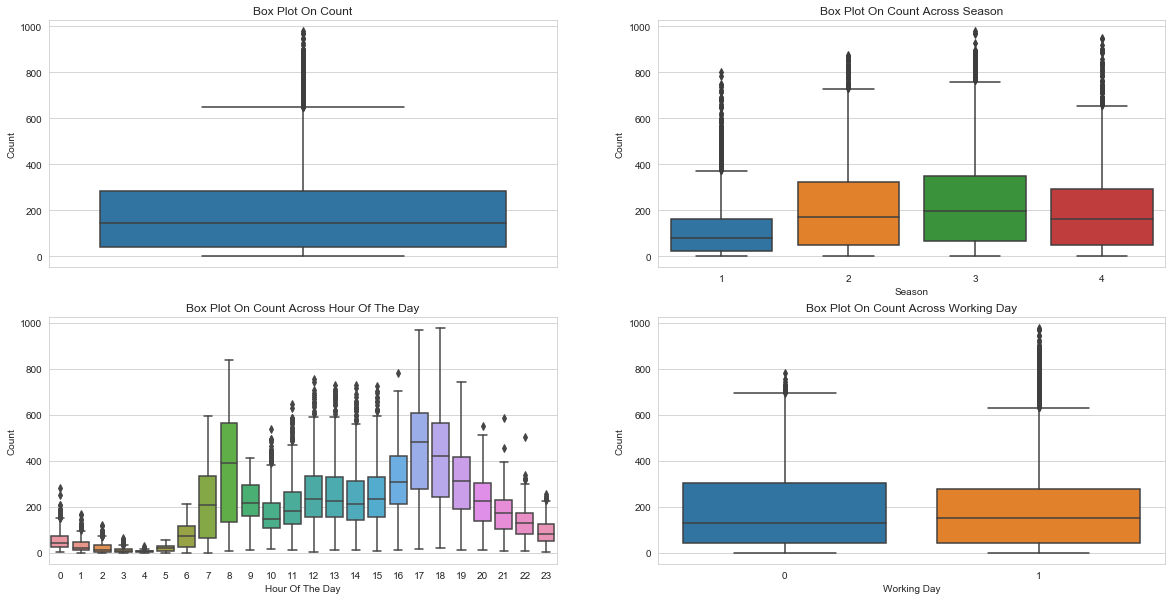

In [459]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sn.boxplot(data=raw_data,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=raw_data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=raw_data,y="count",x="Hour",orient="v",ax=axes[1][0])
sn.boxplot(data=raw_data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## Handling With Outliers

In [460]:
raw_data_without_outliers = raw_data[np.abs(raw_data["count"]-raw_data["count"].mean())<=(3*raw_data["count"].std())] 

In [461]:
print ("Shape Of The Before Ouliers: ",raw_data.shape)
print ("Shape Of The After Ouliers: ",raw_data_without_outliers.shape)

Shape Of The Before Ouliers:  (10886, 16)
Shape Of The After Ouliers:  (10739, 16)


## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

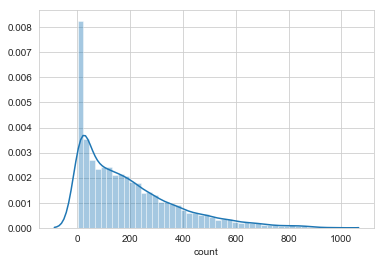

In [462]:
fig.set_size_inches(20, 10)
sns.distplot(raw_data["count"])

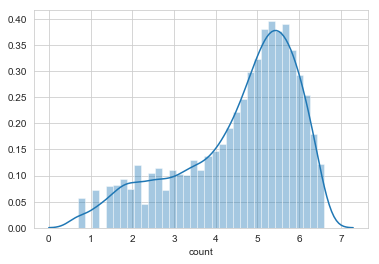

In [483]:
fig.set_size_inches(20, 10)
sns.distplot(np.log1p(raw_data_without_outliers["count"]))

### FEATURE ENGINEERING 
###### Getting some new features and dropping some useless or less relevant reatures.


In [464]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Year,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5


In [465]:
# seperating season as per values. It will enhance features.
season = pd.get_dummies(raw_data['season'],prefix='season')
raw_data = pd.concat([raw_data,season],axis=1)

In [466]:
# same for weather.
weather=pd.get_dummies(raw_data['weather'],prefix='weather')
raw_data=pd.concat([raw_data,weather],axis=1)

In [467]:
# now can drop weather and season.
raw_data.drop(['season','weather'],inplace=True,axis=1)

1) “casual” and “registered” attributes are also not taken into account since they are leakage variables in nature and need to be dropped during model building.

2) “atemp” variable is not taken into account since “atemp” and “temp” has strong correlation with each other.

In [468]:
raw_data.drop(['atemp',"casual","registered","datetime"], axis=1, inplace = True)

In [469]:
train_data.shape

(9886, 17)

In [470]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [471]:
train_labels = train_data['count'].values
train_data = train_data.drop('count', axis = 1)

In [472]:
train_data.shape

(9886, 17)

In [473]:
train_labels = train_labels.reshape((9886,1))

(9886,)

In [474]:
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop('count', axis = 1)

In [476]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

### Making Scorer

In [478]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

### Applying Of Models

#### LinearRegression

In [481]:
from sklearn.linear_model import LinearRegression

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
lModel.fit(X = train_data,y = np.log1p(train_labels))
predsLR = lModel.predict(X= test_data)
print ("RMSLE Value For Linear Regression In Validation: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsLR),False))

RMSLE Value For Linear Regression In Validation:  1.00100111867


In [485]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor() 
rfModel.fit(X = train_data,y = np.log1p(train_labels))
predsRF = rfModel.predict(X= test_data)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsRF),False))

RMSLE Value For Random Forest:  0.377440301847


In [501]:
from sklearn.ensemble import GradientBoostingRegressor
gbrModel = GradientBoostingRegressor(n_estimators=100) 
gbrModel.fit(X = train_data,y = np.log1p(train_labels))
predsGBR = gbrModel.predict(X= test_data)
print ("RMSLE Value For GradientBoostingRegressor: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsGBR),False))

RMSLE Value For GradientBoostingRegressor:  0.386959139857


In [502]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [506]:
rf_randomCV = RandomizedSearchCV(estimator = rfModel, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [507]:
rf_random.fit(X = train_data,y = np.log1p(train_labels))
rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=300

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=15, bootstrap=True, total=   1.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=15, bootstrap=True, total=   1.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, bootstrap=True, total=   2.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=15, bootstrap=True, total=   1.4s
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=  13.9s
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   37.0s finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [509]:
rf1 = RandomForestRegressor(bootstrap= True, max_depth = 10, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2, n_estimators = 400)

In [510]:
rf1.fit(X = train_data,y = np.log1p(train_labels))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [511]:
predsRandomRF = rf1.predict(X = test_data)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsRandomRF),False))

RMSLE Value For Random Forest:  0.399344003836
